In [2]:
%matplotlib ipympl
from QDP import qdp
import numpy as np
import matplotlib.pyplot as plt
import os.path
dp = '/home/ebert/jupyter-notebooks/FNode-data'

exclude = [2]

In [3]:
exp_name = ''
if exp_name:
    exp_date = '_'.join(exp_name.split('_')[:3])
    experiment_file = os.path.join(exp_date, exp_name, 'results.hdf5')
else:
    experiment_file = ''
q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)
print "ivars: {}".format(q.experiments[0]['variable_list'])
roi_map = ['cs', 'rb']
cs_cuts = [[170],[170]]
rb_cuts = [[170],[170]]
q.set_thresholds(cs_cuts, roi=0)
q.set_thresholds(rb_cuts, roi=1)
# results = q.generate_thresholds(loss=False)
retention = q.apply_thresholds(exclude_rois=exclude)
tbl_str = "ivar:\t{0}\tretention:{1} +- {2}"
entries = np.product(retention['retention'].shape[:-1])
for i in range(entries):
    print(tbl_str.format(
        retention['ivar'].reshape((entries,-1))[i][0],
        retention['retention'].reshape((entries,-1))[i],
        retention['error'].reshape((entries,-1))[i]
    ))
# q.save_experiment_data()
q.experiments[0]['variable_list']
xlab = q.experiments[0]['variable_desc'][q.experiments[0]['variable_list'][0]]['description']

fig, ax = plt.subplots()
for e in range(len(retention['ivar'])):
    for r in range(2):
        ax.errorbar(
            retention['ivar'][e, :, r], retention['retention'][e, :, r],
            yerr=retention['error'][e, :, r],
            fmt=['bo','rx'][r]
        )
ax.set_ylim(0, 1.01)
ax.set_xlabel(xlab)
ax.set_ylabel('F=4(2) pop.')

fmts = ['pdf', 'png']
fn = os.path.join(dp, q.experiments[0]['source_path'], 'retention_scan.{}')
for fmt in fmts:
    fig.savefig(fn.format(fmt), dpi=200, format=fmt)

data at: 2018_12_18/2018_12_18_13_49_46_izreadretention/results.hdf5
name 'fort_exp' is not defined
name 'rb_uwave_freq' is not defined
ivars: [u'Iz_read']
Could not find conditional retention
Could not find conditional retention
Could not find conditional retention
Could not find conditional retention
Could not find conditional retention
Could not find conditional retention
Could not find conditional retention
Could not find conditional retention
Could not find conditional retention
Could not find conditional retention
Could not find conditional retention
ivar:	-0.11	retention:[0.00000000e+00 0.00000000e+00 3.10440858e-10] +- [nan nan nan]
ivar:	-0.09	retention:[0.0e+000 0.0e+000 1.8e-322] +- [nan nan nan]
ivar:	-0.07	retention:[0.00e+000 0.00e+000 2.17e-322] +- [nan nan nan]
ivar:	-0.05	retention:[0.0e+000 0.0e+000 1.8e-322] +- [nan nan nan]
ivar:	-0.03	retention:[0.00e+000 0.00e+000 2.17e-322] +- [nan nan nan]
ivar:	-0.01	retention:[0.0e+000 0.0e+000 1.8e-322] +- [nan nan nan]
ivar:

/home/ebert/jupyter-notebooks/FNode/analyses/qdp/QDP/qdp.py:131: RuntimeWarning: overflow encountered in double_scalars
  errs[r] = (z/n[r].astype('float'))*np.sqrt(ns[r].astype('float')*(1.0-ns[r].astype('float')/n[r].astype('float')))


FigureCanvasNbAgg()

In [15]:
retention['ivar'][e, :, 0]

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ])

<IPython.core.display.Javascript object>


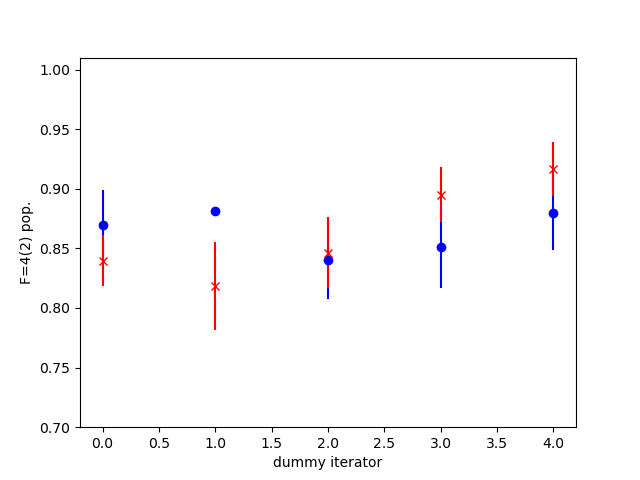

In [8]:
fig, ax = plt.subplots()
for e in range(len(retention['ivar'])):
    for r in range(2):
        ax.errorbar(
            retention['ivar'][e, :, r], retention['retention'][e, :, r],
            yerr=retention['error'][e, :, r],
            fmt=['bo','rx'][r]
        )
ax.set_ylim(0.7, 1.01)
ax.set_xlabel(xlab)
# ax.set_ylabel('Retention')
ax.set_ylabel('F=4(2) pop.')

fmts = ['pdf', 'png']
fn = os.path.join(dp, q.experiments[0]['source_path'], 'retention_scan.{}')
for fmt in fmts:
    fig.savefig(fn.format(fmt), dpi=200, format=fmt)